## Project Summary

This notebook examines the breast cancer wisconsin dataset available from UCI Machine Learning Repository (https://archive-beta.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original), and uses various techniques to explain the predictions made by  popular machine learning models.  Both white box and black box models are used for comparison, and their results are analayzed.  

In [1]:
# read breast-cancer-wisconsin data
import pandas as pd

file_name = "data/breast-cancer-wisconsin.data"
column_names = ["Sample code number", "Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", 
                "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli",
                "Mitoses", "Class"]
                
breast_cancer_data = pd.read_csv(file_name)
breast_cancer_data.columns = column_names
display(breast_cancer_data.head())

Sample code number  Clump Thickness  Uniformity of Cell Size  \
0             1002945                5                        4   
1             1015425                3                        1   
2             1016277                6                        8   
3             1017023                4                        1   
4             1017122                8                       10   

   Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                         4                  5                            7   
1                         1                  1                            2   
2                         8                  1                            3   
3                         1                  3                            2   
4                        10                  8                            7   

  Bare Nuclei  Bland Chromatin  Normal Nucleoli  Mitoses  Class  
0          10                3                2        1      2  
1           2                3                1        1      2  
2           4                3                7        1      2  
3           1                3                1        1      2  
4          10                9                7        1      4

## Data Exploration

In [2]:
print(f"\nThe dimensions of the data are: ", breast_cancer_data.shape)
print(f"\nThe data contains the following fields and data types: ")
print(breast_cancer_data.dtypes)
print(f"\nStatistical summary: ")
display(breast_cancer_data.describe())


The dimensions of the data are:  (698, 11)

The data contains the following fields and data types: 
Sample code number              int64
Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

Statistical summary: 


Sample code number  Clump Thickness  Uniformity of Cell Size  \
count        6.980000e+02       698.000000               698.000000   
mean         1.071807e+06         4.416905                 3.137536   
std          6.175323e+05         2.817673                 3.052575   
min          6.163400e+04         1.000000                 1.000000   
25%          8.702582e+05         2.000000                 1.000000   
50%          1.171710e+06         4.000000                 1.000000   
75%          1.238354e+06         6.000000                 5.000000   
max          1.345435e+07        10.000000                10.000000   

       Uniformity of Cell Shape  Marginal Adhesion  \
count                698.000000         698.000000   
mean                   3.210602           2.809456   
std                    2.972867           2.856606   
min                    1.000000           1.000000   
25%                    1.000000           1.000000   
50%                    1.000000           1.000000   
75%                    5.000000           4.000000   
max                   10.000000          10.000000   

       Single Epithelial Cell Size  Bland Chromatin  Normal Nucleoli  \
count                   698.000000       698.000000       698.000000   
mean                      3.217765         3.438395         2.869628   
std                       2.215408         2.440056         3.055004   
min                       1.000000         1.000000         1.000000   
25%                       2.000000         2.000000         1.000000   
50%                       2.000000         3.000000         1.000000   
75%                       4.000000         5.000000         4.000000   
max                      10.000000        10.000000        10.000000   

          Mitoses       Class  
count  698.000000  698.000000  
mean     1.590258    2.690544  
std      1.716162    0.951596  
min      1.000000    2.000000  
25%      1.000000    2.000000  
50%      1.000000    2.000000  
75%      1.000000    4.000000  
max     10.000000    4.000000

In [3]:
import numpy as np

# check values of categorical variable 
print(breast_cancer_data["Bare Nuclei"].unique())
breast_cancer_data["Bare Nuclei"] = breast_cancer_data["Bare Nuclei"].replace({'?': np.nan})

# check and drop null values
print(breast_cancer_data.isnull().sum())
breast_cancer_data = breast_cancer_data.dropna()
breast_cancer_data["Bare Nuclei"] = breast_cancer_data["Bare Nuclei"].astype(int)

['10' '2' '4' '1' '3' '9' '7' '?' '5' '8' '6']
Sample code number              0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64


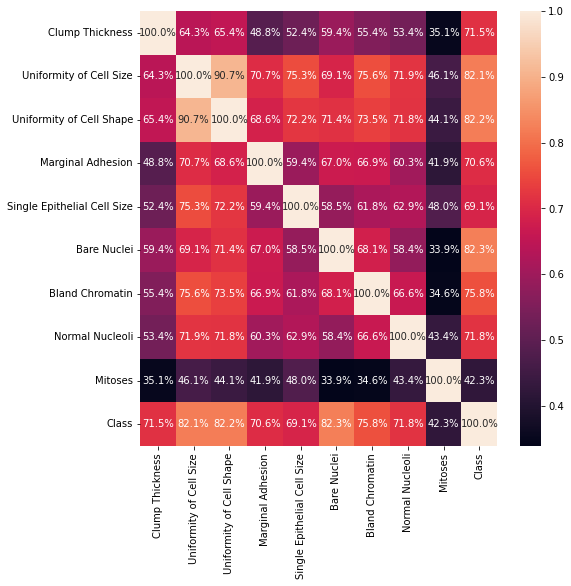

In [4]:
import matplotlib.pyplot as plt
#!pip install seaborn
import seaborn as sns

plt.figure(figsize=(8, 8))
sns.heatmap(breast_cancer_data.iloc[:, 1:].corr(), annot=True, fmt='.1%')
plt.show()

The correlation heatmap shows that features:  <b>Bare Nuclei</b>, <b>Uniformity of Cell Shape</b>, <b>Uniformity of Cell Size</b> have the strongest correlation with the target variable Class

## Model Application

In [5]:
# standardize the dataset

from sklearn.preprocessing import StandardScaler
X = breast_cancer_data.iloc[:,1:-1]
std = StandardScaler()
X_std = std.fit_transform(X)
X_std = pd.DataFrame(X_std, columns = column_names[1:-1] )
y = breast_cancer_data.iloc[:,-1]

In [6]:
# split the data into training the testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.30, random_state=0)

### White Box Models

A white box is a type of machine learning model that can clearly explain how the model
behaves and what are the influencing variables that drive the model predictions.

In [7]:
# Logistic Regression Classifier

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lg_clf = LogisticRegression(random_state=0)
lg_clf.fit(X_train, y_train)
print("Logistic Regression accuracy score: ", accuracy_score(lg_clf.predict(X_test), y_test))

Logistic Regression accuracy score:  0.9707317073170731


The interpretation of the weights in <b>logistic regression</b> differs from the interpretation of the weights in linear regression, since the outcome in logistic regression is a probability between 0 and 1.  The results of fitting a logistic regression model on the breast cancer dataset produces the following "weights".

In [8]:
print("Logistic Regression Coefficients:  ", lg_clf.coef_[0])

Logistic Regression Coefficients:   [1.30770702 0.1781688  0.78763211 0.87199713 0.03735545 1.40349854
 0.74188346 0.66856167 0.99611431]


The Logistic Regression model suggests:

An increase in the <b>Bare Nuclei</b> changes (increases) the odds of cancer vs. no cancer by a factor of 3.70, when all other features remain the same.

An increase in the <b>Clump Thickness</b> changes (increases) the odds of cancer vs. no cancer by a factor of 4.069, when all other features remain the same.

An increase in the <b>Mitoses</b> changes (increases) the odds of cancer vs. no cancer by a factor of 2.707, when all other features remain the same.

Keep in mind that correlation does not imply causation.

In [9]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(criterion="gini", random_state=0)
tree_clf.fit(X_train, y_train)
print("Decision Tree Classfier accuracy score: ", accuracy_score(tree_clf.predict(X_test), y_test))

Decision Tree Classfier accuracy score:  0.9609756097560975


One of the easiest ways to interpret a decision tree is visually by starting from the root node of the tree and proceeding to the next nodes.  The edges of the tree correspond to the outcome of a test and connect to the next node or leaf. Once a leaf node is reached, it shows the predicted outcome.

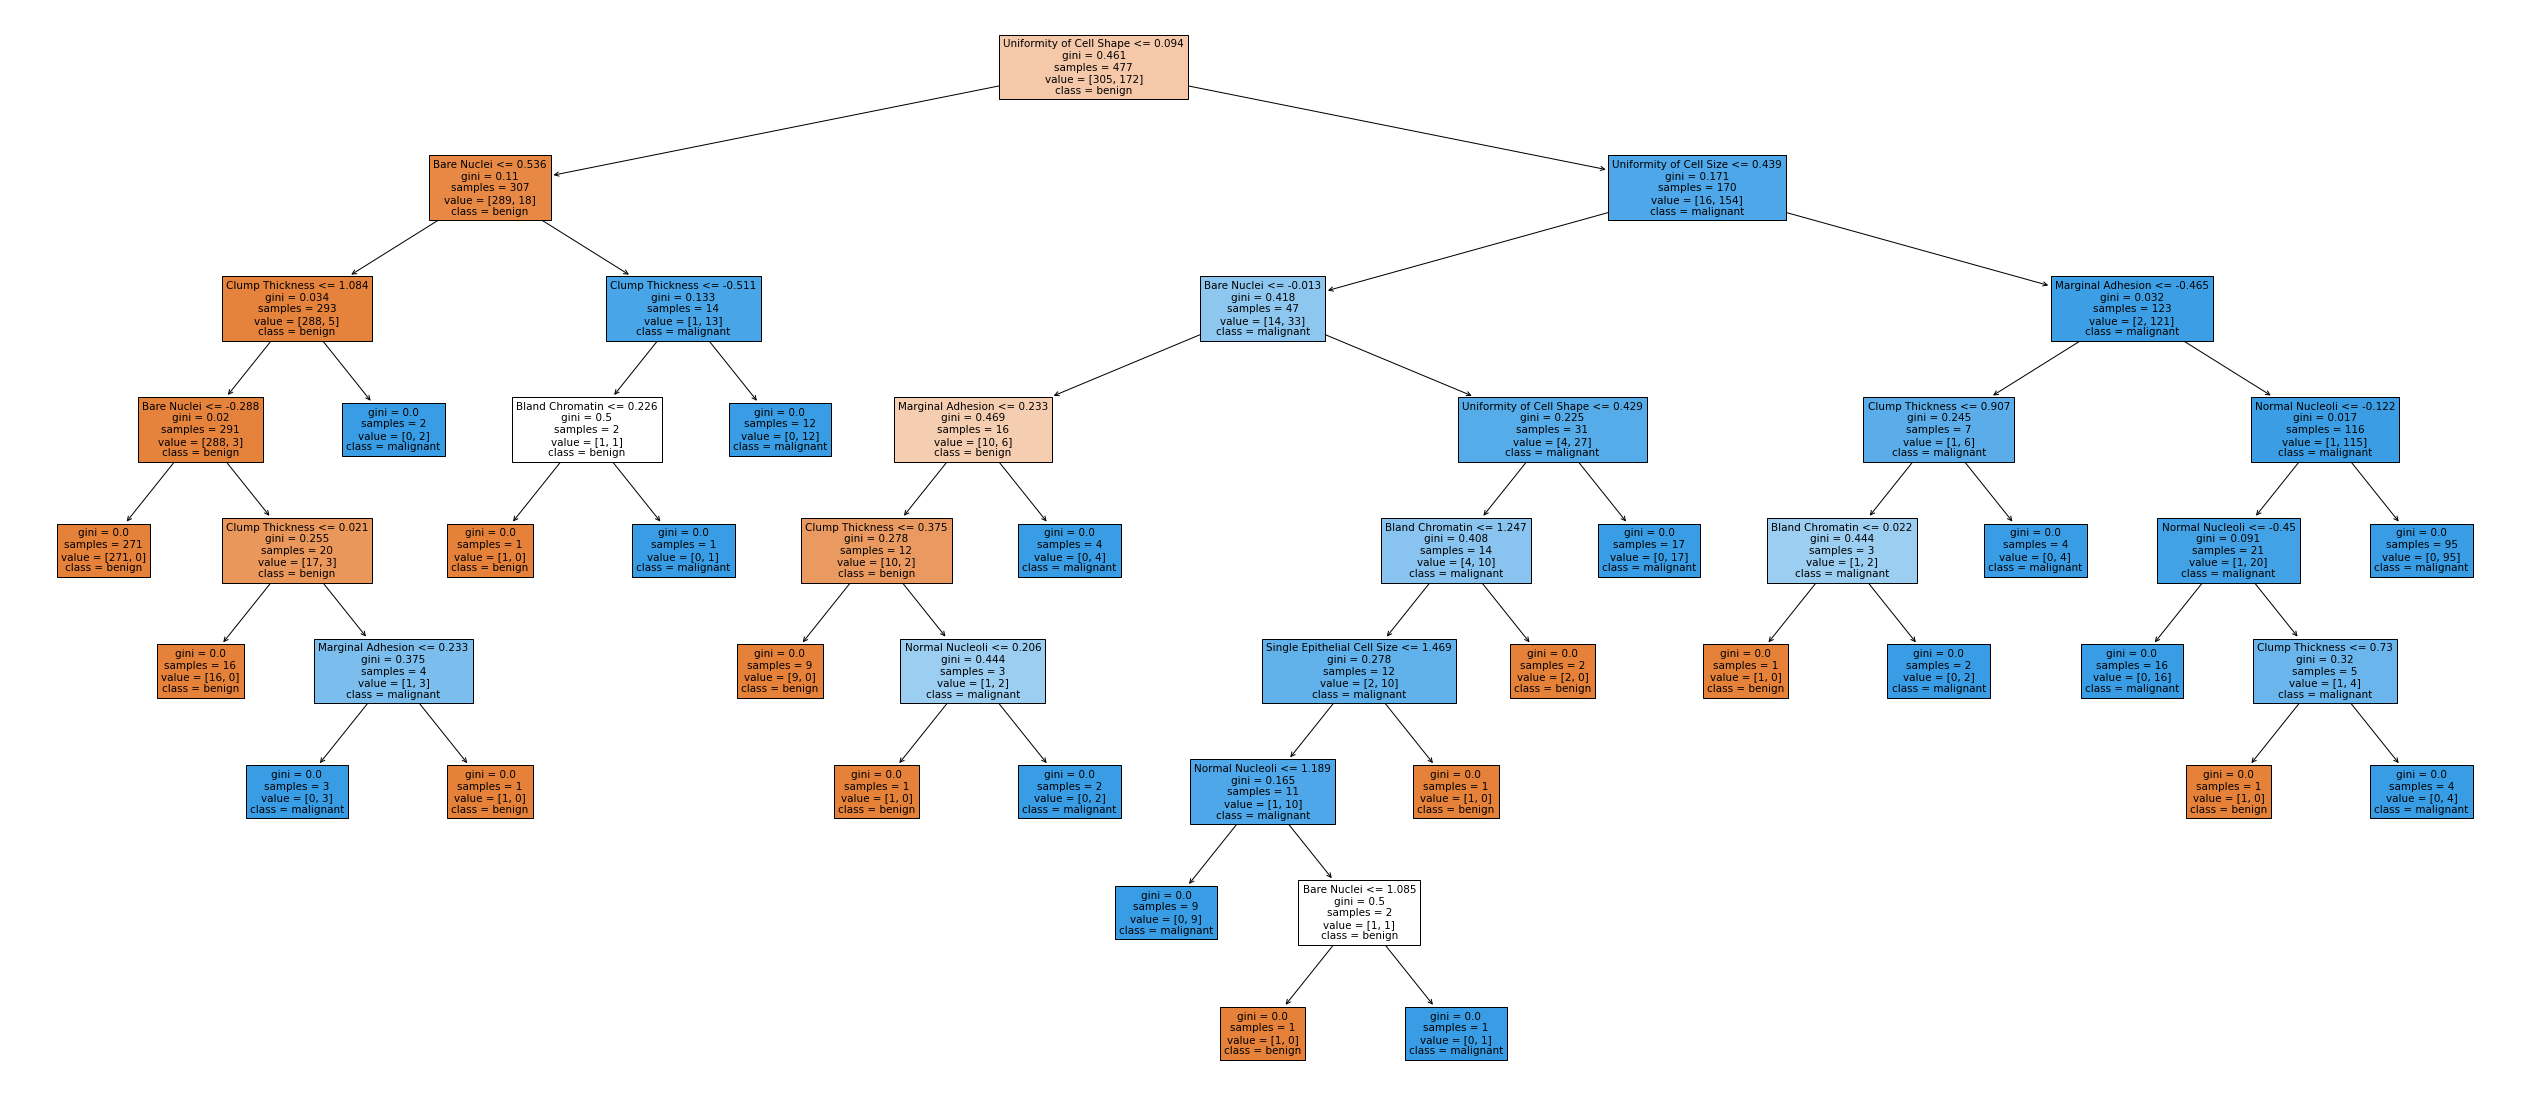

In [10]:
from sklearn import tree
fig = plt.figure(figsize=(45,20))
_ = tree.plot_tree(tree_clf, 
                   feature_names=column_names[1:-1],  
                   class_names=["benign", "malignant"],
                   filled=True)

A great advantage of the sklearn implementation of Decision Tree is feature_importances_ that helps us understand which features are actually helpful compared to others.

In [11]:
print(tree_clf.feature_importances_)

[0.05605297 0.0245215  0.71983738 0.02684412 0.00688837 0.13290139
 0.02143266 0.01152162 0.        ]


The top contributing features to the Decision Tree Calssifer is <b>Uniformity of Cell Shape</b>, <b>Bare Nuclei</b> and <b>Clump Thickness</b>.  It is interesting to note that the score for Mitosis is 0, which means that it has no effect on the target variable.

### Black Box Models

Black box models have the capability to model
complex situations with non linear relationships and interactions between inputs. Due to the
complexities of these models, their inner workings also become harder to interpret.

In [12]:
# Random Forest Classfier
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(criterion='entropy', random_state=0)
forest_clf.fit(X_train, y_train)
print("Random Forest Classfier accuracy score: ", accuracy_score(forest_clf.predict(X_test), y_test))

Random Forest Classfier accuracy score:  0.9853658536585366


In [13]:
# SVM Classfier
from sklearn.svm import SVC

svm_clf = SVC(probability=True)
svm_clf.fit(X_train, y_train)
print("SVM Classfier accuracy score: ", accuracy_score(svm_clf.predict(X_test), y_test))

SVM Classfier accuracy score:  0.975609756097561


In [14]:
# Neural Network Classifier
from sklearn.neural_network import MLPClassifier

nn_clf = MLPClassifier(max_iter=500)
nn_clf.fit(X_train, y_train)
print("Neural Network Classfier accuracy score: ", accuracy_score(nn_clf.predict(X_test), y_test))

Neural Network Classfier accuracy score:  0.9609756097560975


In some area such as medicine, having an interpretable model is more desirable when interpretability is more important than accuracy.

## Interpreting Black Box Models

### PDP

The partial dependence plot (short PDP or PD plot) shows the marginal effect one or two features have on the predicted outcome of a machine learning model

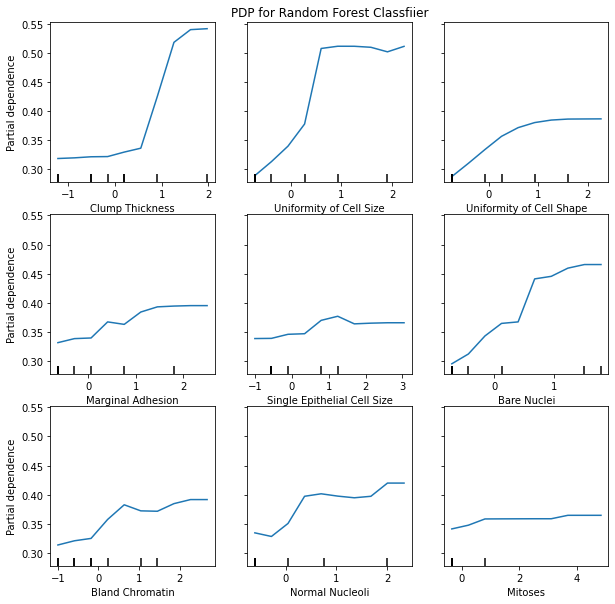

In [15]:
# using PDP to explain the Random Forest model
from sklearn.inspection import PartialDependenceDisplay


fig, ax = plt.subplots(figsize=(10, 10))
PartialDependenceDisplay.from_estimator(forest_clf, X_std, features=column_names[1:-1], ax=ax)
ax.set_title("PDP for Random Forest Classfiier")
plt.show()


In this model, we fit a random forest classifer to predict whether the breast cancer is benign or malignant based on clinical data.  From the PD plot we can visualize the partial dependence whether the cancer is benign or malignant based on different features of the data.  From the plot, we can identify that the probability that the cancer is malignant increases with increases in <b>Clump Thickness</b> and <b>Uniformity of Cell Size</b>.

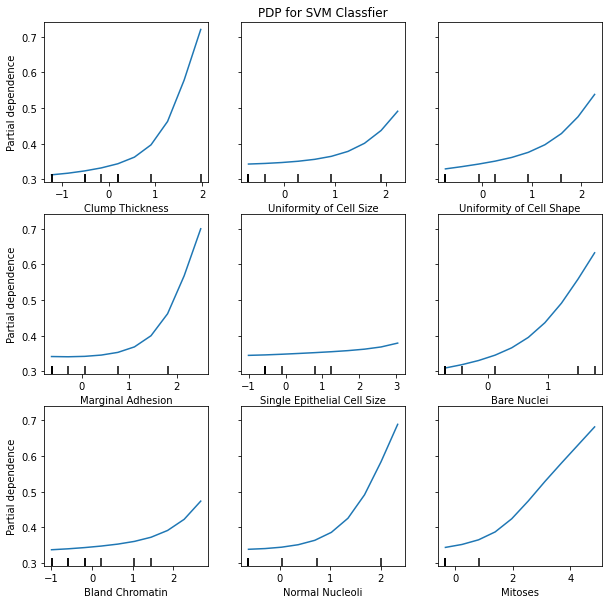

In [16]:
# using PDP to explain the SVM model

fig, ax = plt.subplots(figsize=(10, 10))
PartialDependenceDisplay.from_estimator(svm_clf, X_std, features=column_names[1:-1], ax=ax)
ax.set_title("PDP for SVM Classfier")
plt.show()

In the SVM model, we can visualize that the probability that the cancer is malignant increases with increases in <b>Clump Thickness</b>, <b>Marginal Adhesion</b> and <b>Normal Nucleoli</b>.  Marginal Adhesion and Normal Nucleoli are features that were not crucial in the Random Forest Classifier.

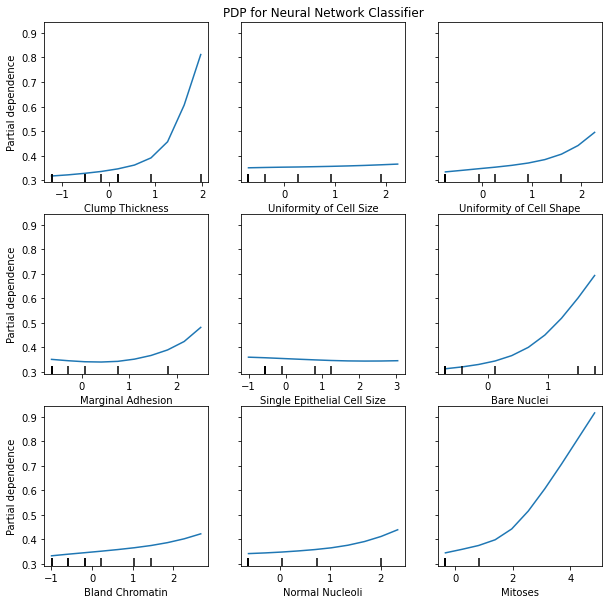

In [17]:
# using PDP to explain the Neural Network model

fig, ax = plt.subplots(figsize=(10, 10))
PartialDependenceDisplay.from_estimator(nn_clf, X_std, features=column_names[1:-1], ax=ax)
ax.set_title("PDP for Neural Network Classifier")
plt.show()

In the Neural Network model, increases in <b>Clump Thickness</b> and <b>Bare Nuclei</b> are the influencing factors that increase the cancer's malignant potential. 

### Lime

The output of LIME is a list of explanations, reflecting the contribution of each feature to the prediction of a data sample. This provides local interpretability, and it also provides insights to which feature changes will have most impact on the prediction.

In [18]:
import lime
from lime import lime_tabular

# LIME has one explainer for all the models
explainer = lime.lime_tabular.LimeTabularExplainer(np.array(X_train), feature_names=X_train.columns,
                                                  class_names=[2, 4], verbose=True, mode='classification')

In [19]:
# using lime to explain the Random Forest model prediction 
# using the 5th observation in the test data set
j = 5

exp = explainer.explain_instance(X_test.iloc[j], forest_clf.predict_proba, num_features=9)
exp.show_in_notebook(show_table=True)

Intercept 0.5680326127991991
Prediction_local [1.09903963]
Right: 0.97


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


The central plot shows the contributions of the top features to a prediction for the Random Forest model. So for this patient, the model predicted that the cancer is malignant with 97% probability.  

In [20]:
# using lime to explain the SVM model prediction

j = 5
exp = explainer.explain_instance(X_test.iloc[j], svm_clf.predict_proba, num_features=9)
exp.show_in_notebook(show_table=True)

Intercept 0.42009561591460093
Prediction_local [1.47973527]
Right: 0.9691995519558044


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


The SVM model predicted "malignant" with 97% probability for this particular patient.  The top features contributing to its prediction are Clump Thickness, Marginal Adhesion and Normal Nucleoli.

In [21]:
# using lime to explain the Neural Network model prediction
j = 5

exp = explainer.explain_instance(X_test.iloc[j], nn_clf.predict_proba, num_features=9)
exp.show_in_notebook(show_table=True)

Intercept 0.5014464773645698
Prediction_local [1.45984039]
Right: 0.9999959242900404


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


The Neural Network model predicted "malignant" with 100% probability.  The top features contributing to its prediction are Clump Thickness, Mitoses and Marginal Adhesion.

### SHAP

SHAP shows the contribution or the importance of each feature on the prediction of the model

Exact explainer: 206it [00:23,  5.59it/s]                                                                                                                                                                                                       


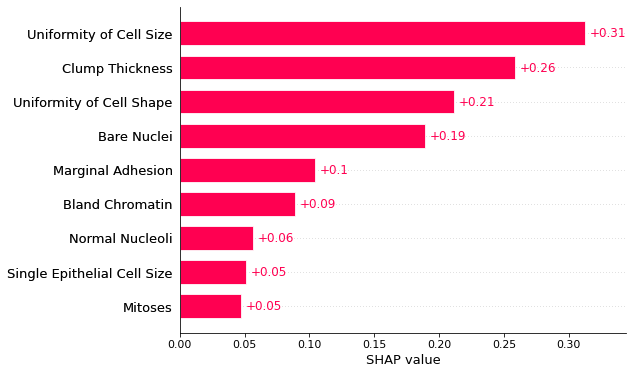

In [22]:
import shap

# using shap to explain the Random Forest model prediction

explainer = shap.Explainer(forest_clf.predict, X_test)
shap_values = explainer(X_test)
shap.plots.bar(shap_values[5])

The bar plot provides a most complete display of a single prediction.  It shows us what are the main features affecting the prediction of a single observation using the Random Forest Classifier, and the magnitude of the SHAP value or the underlying contributions for each feature.

Exact explainer: 206it [00:12,  3.95it/s]                                                                                                                                                                                                       


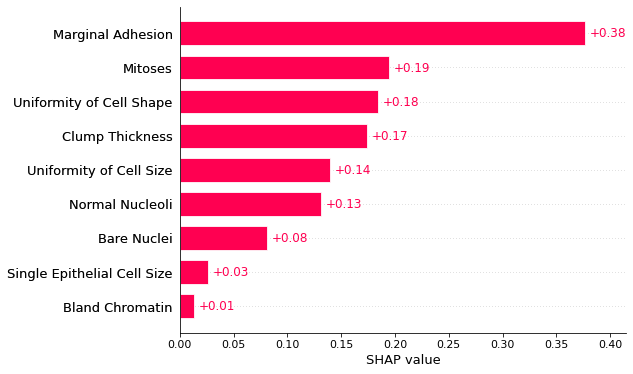

In [23]:
# using SHAP to explain the SVM model prediction

explainer = shap.Explainer(svm_clf.predict, X_test)
shap_values = explainer(X_test)
shap.plots.bar(shap_values[5])

For the SVM classifer, the SHAP bar plot shows Mitoses, Uniformity of Cell Shape, and Clump Thickness as the leading contributing features to the prediction.

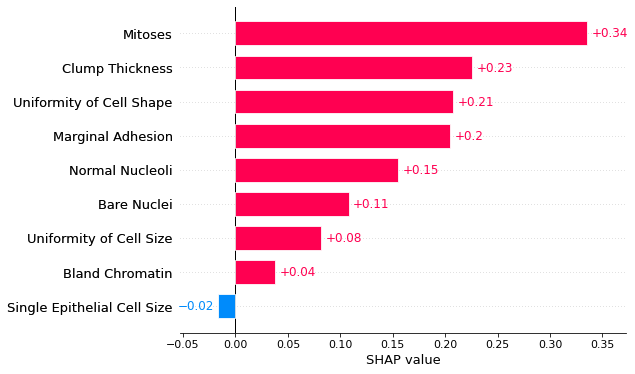

In [24]:
# using SHAP to explain Neural Network model prediction

explainer = shap.Explainer(nn_clf.predict, X_test)
shap_values = explainer(X_test)
shap.plots.bar(shap_values[5])

For the Neural Network classifer, the SHAP bar plot shows Mitoses, Clump Thickness and Marginal Adhesion as the leading contributing features for this particular prediction.

## Summary of Results

In high stakes decision areas such as healthcare and finance, we must understand the different types of models that are used and be able to interprete how the models make predictions.  In this project, 2 white box models and 3 black box models were examined with 3 different interpretability techniques applied to each of the black box models. The following results were collected based on the feature importance for each model:

<table ><tr><th>Model<th><th>Accuracy<th><th>Technique Applied<th><th>Top Contributing Features<th <tr><tr>
<tr><td>Logistic Regression<td><td>0.9707<td><td>None<td><td>Bare Nuclei, Clump Thickness, Mitoses<td><tr>
<tr><td>Decision Tree<td><td>0.9609<td><td>PDP<td><td>Uniformity of Cell Shape, Bare Nuceli, Clump Thickness<td><tr>
<tr><td>Random Forest<td><td>0.9756<td><td>PDP<td><td>Clump Thickness, Uniformity of Cell Size<td><tr>
<tr><td>Random Forest<td><td>0.9756<td><td>LIME<td><td>Clump Thickness, Bland Chromatin, Uniformity of Cell Shape<td><tr>
<tr><td>Random Forest<td><td>0.9756<td><td>SHAP<td><td> Uniformity of Cell Shape, Uniformity of Cell Size, Clump Thickness<td><tr>
<tr><td>Support Vector Machine<td><td>0.9756<td><td>PDP<td><td>Clump Thickness, Marginal Adhesion,Normal Nucleoli <td><tr>
<tr><td>Support Vector Machine<td><td>0.9756<td><td>LIME<td><td>Clump Thickness, Marginal Adhesion,Normal Nucleoli <td><tr>
<tr><td>Support Vector Machine<td><td>0.9756<td><td>SHAP<td><td>Marginal Adhesion, Mitoses, Uniformity of Cell Shape<td><tr>
<tr><td>Neural Network<td><td>0.9609<td><td>PDP<td><td>Clump Thickness, Bare Nuclei, Mitoses<td><tr>
<tr><td>Neural Network<td><td>0.9609<td><td>LIME<td><td>Clump Thickness, Mitoses, Marginal Adhesion<td><tr>
<tr><td>Neural Network<td><td>0.9609<td><td>SHAP<td><td>Mitoses, Clump Thickness, Marginal Adhesion<td><tr><table>

All of the models were shown to have high accuracy and comparable performance.  When it comes to identifying the top contributing features in a model's predictions, results varied. Feature importance varied by the type of model implemented.  For the same model, explanations varied by the type of interpretability technique chosen.  So there is no concensus in the explanations. Each model, technique combination yielded a different result.   

There is no real consensus about what interpretability is in machine learning. There is no known metric to quantify and compare the quality of interpretability methods.  Lacking common metrics for interpretability quality and trust poses a huge challenge for data scientists/machine learning engineers that need to choose among different methods for interpretability, and/or choose among a multitude of machine learning models the one that is most interpretable and trustworthy.

## 6D Framework

### Decomposition

This project attempts to apply several popular interpretability techniques to explain machine learning models.  For comparison, both white box models and black box models were used in the analysis.  In order to manage the scope of 
the project, a single dataset was examined, and three explanatory techniques were applied to three different black box models

### Domain Expertise

The project explores various explanatory techniques on black box models using health care data. The application of each of the machine learning models, their performance along with the explainations of the predictions made by the models using explanatory techniques should be discussed and confirmed with domain experts.  In this case, the use of Jupyter Notebook allows the data analysis, model design and execution and the analysis of the results to be shared with subject matter experts.

### Data 

The data used for the project was collected from UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/index.php).  The data has already been sanitized with personal information removed to protect patient privacy.  Data Exploration was conducted to understand the raw data and clean up was performed to make the data ready for machine learning.

### Design

The goal of the project is to apply various interpretability techniques to machine learning models and analyze their results.  Both white box and black box models were used, feature importance of the model was used to as benchmark.  Since the dataset is very small in size, the models exhibited similar performances without the need for hyperparameter tuning.  

### Diagnosis

This project works with healthcare data.  Data biases can have an enormous consequences on healthcare and human lives.  Effective datasets must be based on a diverse range of race, gender, geography in order to avoid biases algorithms.  Ultimately, people are responsible for the collection and use of data, and great care must be taken to ensure that machine learning tools do not perpetuate biases either intentionally or unintentionally

### Deployment

Docker allows me to create, deploy, and run applications in containers. Any supporting software required by my project is included in the Docker container that hosts my applications.  I can quickly generate new containers if needed.  Additional models can be added for future analysis and the existing models can be modified or improved based on feedback from domain experts.